In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data=pd.read_csv("mymoviedb.csv", lineterminator="\n")

In [3]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
data.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [6]:
data["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [7]:
data.duplicated().sum()

0

**exploration summary**

-we have a data consisting of 9827 rows and 9 columns

-no NaNs no or duplicated value

-Date column needs to be casted into date_time and extract only the year value

-Overview, Original_language and poster_url wouldn't be so useful during the analysis, so 
we'll drop them

-there is noticable outliers in the popularity column

-vote_average better be categorised for proper analysis

-Genre column has a comma seperated values and a white spaces that needs to be handled and casted into categor-y

# changing date from object datatype to date_time format

In [8]:
data['Release_Date']=pd.to_datetime(data['Release_Date'])
data['Release_Date'].dtypes

dtype('<M8[ns]')

# Accessing only year from the date

In [9]:
data['Release_Date']=data['Release_Date'].dt.year

In [10]:
data['Release_Date'].dtypes

dtype('int32')

In [11]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# droping columns (Overview, Original_language and poster_url)

In [12]:
data.drop(['Overview','Original_Language','Poster_Url'], axis=1, inplace=True)

In [13]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing vote_average column in 4 category:
- popular
- average
- below_average
- not_popular


In [14]:
def categorize(data, col, labels):
    edges= [data[col].describe()['min'],
            data[col].describe()['25%'],
           data[col].describe()['50%'],
           data[col].describe()['75%'],
           data[col].describe()['max']]

    data[col]=pd.cut(data[col], edges, labels=labels,duplicates='drop')
    return data

In [15]:
# def categorize(data, col, labels):
#     edges = [
#         data[col].min(),
#         data[col].quantile(0.25),
#         data[col].quantile(0.5),
#         data[col].quantile(0.75),
#         data[col].max()
#     ]
#     data[col] = pd.cut(data[col], edges, labels=labels, duplicates='drop')
#     return data


In [16]:
labels = ['Not_Popular', 'Below_avg', 'Average', 'Popular']
data = categorize(data, 'Vote_Average', labels)

In [17]:
data['Vote_Average'].unique()

['Popular', 'Below_avg', 'Average', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_avg' < 'Average' < 'Popular']

In [18]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [19]:
data['Vote_Average'].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Average        2412
Below_avg      2398
Name: count, dtype: int64

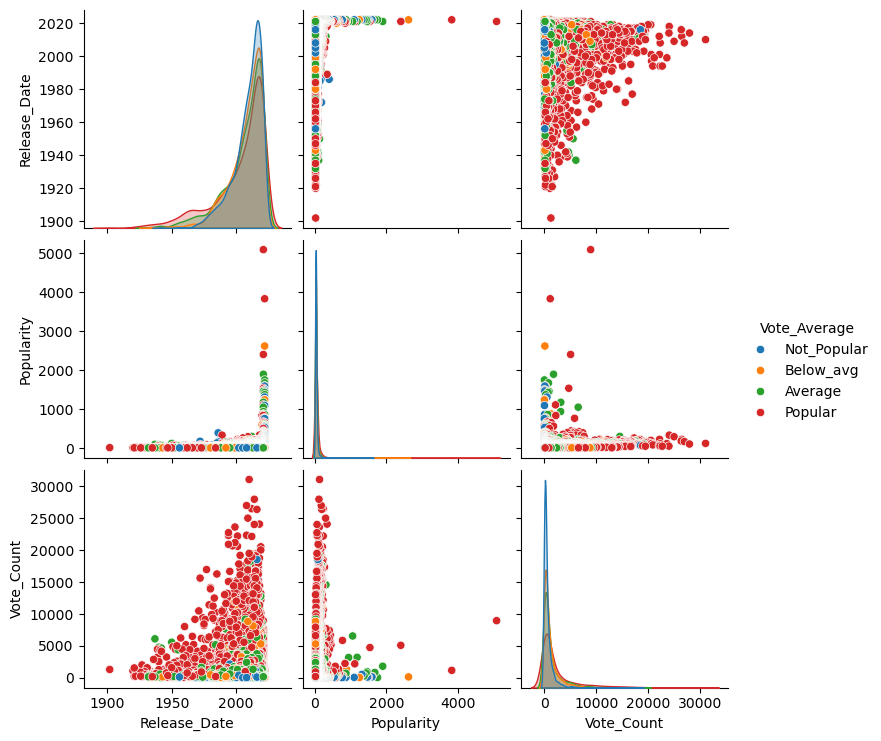

In [20]:
sns.pairplot(data=data, hue="Vote_Average")
plt.show()

In [21]:
data.dropna(inplace=True)
data.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# we will split genre into list and then convert dataframe to have only one genre per row for each movie

In [23]:
data['Genre'] = data['Genre'].str.split(", ")
data= data.explode('Genre').reset_index(drop=True)
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# casting column into category 

In [25]:
data['Genre']=data['Genre'].astype('category')
data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [27]:
data.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data visualization

In [28]:
sns.set_style("whitegrid")

# What is the most frequent genre of movies released on Netflix

In [29]:
data['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

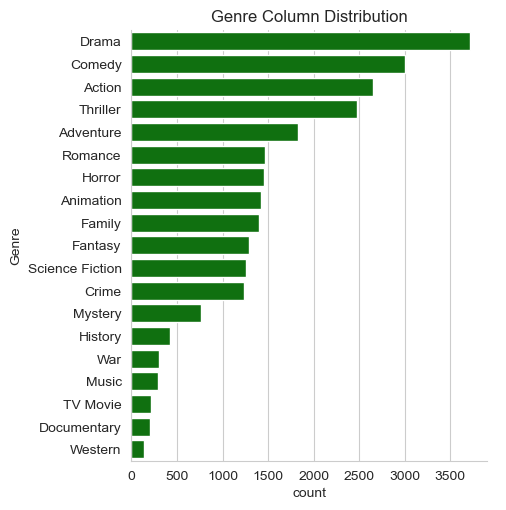

In [32]:
sns.catplot(y='Genre', data=data, kind='count', order=data['Genre'].value_counts().index, color='g')
plt.title('Genre Column Distribution')
plt.show()

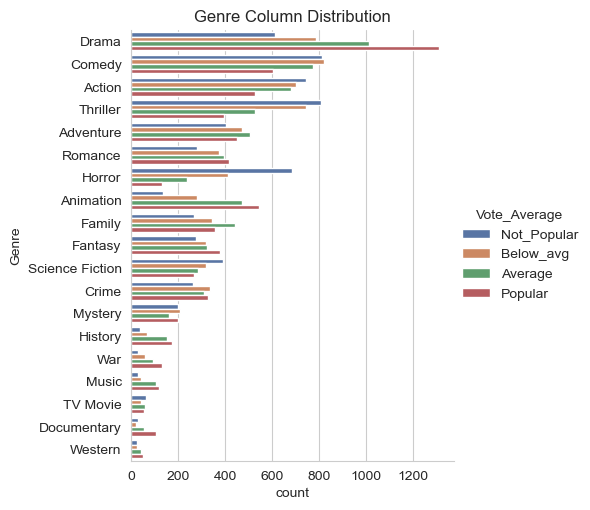

In [42]:
sns.catplot(y='Genre', data=data,hue='Vote_Average', kind='count', order=data['Genre'].value_counts().index, palette="deep")
plt.title('Genre Column Distribution')
plt.show()

# Which has highest votes in vote average column?

In [43]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


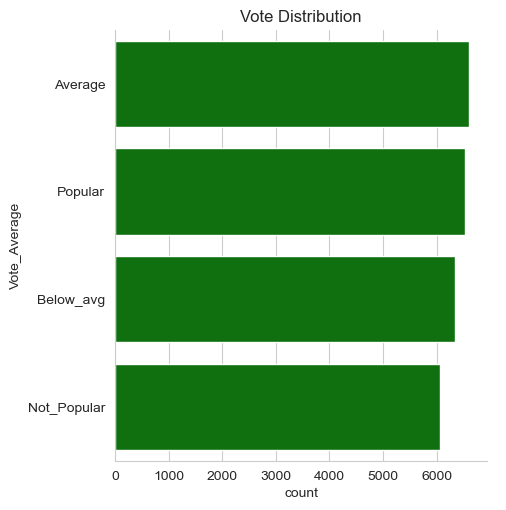

In [45]:
sns.catplot(y="Vote_Average", data=data, kind="count",order=data['Vote_Average'].value_counts().index, color='g')
plt.title('Vote Distribution')
plt.show()

# What movie got the highest popularity? what's its genre?

In [46]:
data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [49]:
data[data['Popularity'] == data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


Spider-Man: No Way Home, with genre [ACTION, ADVENTURE, SCIENCE FICTION]

# What movie got the lowest popularity? what's its genre?

In [53]:
data[data['Popularity']==data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


The United States vs. Billie Holiday[MUSIC, DRAMA, HISTORY] AND Threads[WAR, DRAMA, SCIENCE FICTION]

# Which year has the most filmed movies?

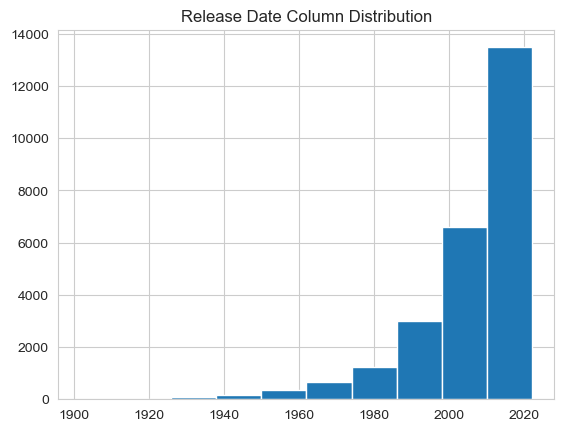

In [54]:
data['Release_Date'].hist()
plt.title("Release Date Column Distribution")
plt.show()

Summary:
1. What is the most frequent genre of movies released on Netflix.
   
    Drama genre is the most frequent genre in our dataset.

3. Which has highest votes in vote average column?
   
    Drama again gets the highest votes.

4. What movie got the highest popularity? what's its genre?
   
    Spider-Man: No Way Home, with genre [ACTION, ADVENTURE, SCIENCE FICTION]

5. What movie got the lowest popularity? what's its genre?
   
    The United States vs. Billie Holiday[MUSIC, DRAMA, HISTORY] AND Threads[WAR, DRAMA, SCIENCE FICTION]

6. Which year has the most filmed movies?

   2020 is the year which has most filmed movies